In [1]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import time

### Simple 2d plot

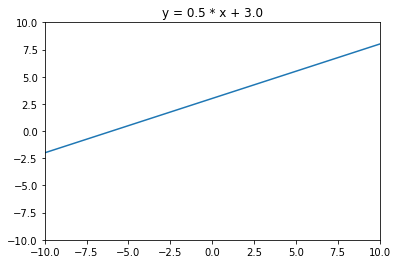

In [2]:
x = np.arange(-10, 10.2, 0.2)
w = 0.5
b = 3.0
y = w * x + b

plt.title("y = {} * x + {}".format(w, b))
plt.plot(x, y)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

#### Given (x, y) pairs, find w and b (in above toy example w=0.5, b=3.0)

In [3]:
# convert to training set
tensor_x = torch.tensor(x, dtype=torch.float).view(-1, 1)
tensor_y = torch.tensor(y, dtype=torch.float).view(-1, 1)

# effect of sampling
trainloader = DataLoader(TensorDataset(tensor_x, tensor_y), batch_size=len(x), shuffle=False, num_workers=2)

### With DataLoader

In [4]:
torch.manual_seed(0)
model = torch.nn.Linear(1, 1)

for name, param in model.named_parameters():
    print(name, '--->', param)
    
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_iters = 100
th = 1e-8
err = 10000
iter = 1

start = time.time()
while err >= th and iter < num_iters:
    for (tx, ty) in trainloader:
        out = model(tx)
    
        loss = criterion(out, ty)
        err = abs(loss.item())
        print("Iteration: {}, Loss: {:.8f}".format(iter + 1, err))
        iter += 1

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

end = time.time()
print("Time: {:.8f}".format(end - start))
print(model.weight, model.bias)

weight ---> Parameter containing:
tensor([[-0.0075]], requires_grad=True)
bias ---> Parameter containing:
tensor([0.5364], requires_grad=True)
Iteration: 2, Loss: 14.82556820
Iteration: 3, Loss: 6.72543478
Iteration: 4, Loss: 5.68977213
Iteration: 5, Loss: 5.38567734
Iteration: 6, Loss: 5.16433716
Iteration: 7, Loss: 4.95900345
Iteration: 8, Loss: 4.76254225
Iteration: 9, Loss: 4.57393694
Iteration: 10, Loss: 4.39280796
Iteration: 11, Loss: 4.21885300
Iteration: 12, Loss: 4.05178642
Iteration: 13, Loss: 3.89133549
Iteration: 14, Loss: 3.73723865
Iteration: 15, Loss: 3.58924413
Iteration: 16, Loss: 3.44711018
Iteration: 17, Loss: 3.31060481
Iteration: 18, Loss: 3.17950463
Iteration: 19, Loss: 3.05359650
Iteration: 20, Loss: 2.93267417
Iteration: 21, Loss: 2.81654000
Iteration: 22, Loss: 2.70500541
Iteration: 23, Loss: 2.59788728
Iteration: 24, Loss: 2.49501061
Iteration: 25, Loss: 2.39620829
Iteration: 26, Loss: 2.30131865
Iteration: 27, Loss: 2.21018624
Iteration: 28, Loss: 2.12266278


### Without DataLoader

In [5]:
torch.manual_seed(0)
model = torch.nn.Linear(1, 1)

for name, param in model.named_parameters():
    print(name, '--->', param)
    
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_iters = 100
th = 1e-8
err = 10000
iter = 1

start = time.time()
while err >= th and iter < num_iters:
    
    # forward pass full batch
    out = model(tensor_x)
    
    loss = criterion(out, tensor_y)
    err = abs(loss.item())
    print("Iteration: {}, Loss: {:.8f}".format(iter + 1, err))
    iter += 1
    
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

end = time.time()
print("Time: {:.8f}".format(end - start))
print(model.weight, model.bias)

weight ---> Parameter containing:
tensor([[-0.0075]], requires_grad=True)
bias ---> Parameter containing:
tensor([0.5364], requires_grad=True)
Iteration: 2, Loss: 14.82556820
Iteration: 3, Loss: 6.72543478
Iteration: 4, Loss: 5.68977213
Iteration: 5, Loss: 5.38567734
Iteration: 6, Loss: 5.16433716
Iteration: 7, Loss: 4.95900345
Iteration: 8, Loss: 4.76254225
Iteration: 9, Loss: 4.57393694
Iteration: 10, Loss: 4.39280796
Iteration: 11, Loss: 4.21885300
Iteration: 12, Loss: 4.05178642
Iteration: 13, Loss: 3.89133549
Iteration: 14, Loss: 3.73723865
Iteration: 15, Loss: 3.58924413
Iteration: 16, Loss: 3.44711018
Iteration: 17, Loss: 3.31060481
Iteration: 18, Loss: 3.17950463
Iteration: 19, Loss: 3.05359650
Iteration: 20, Loss: 2.93267417
Iteration: 21, Loss: 2.81654000
Iteration: 22, Loss: 2.70500541
Iteration: 23, Loss: 2.59788728
Iteration: 24, Loss: 2.49501061
Iteration: 25, Loss: 2.39620829
Iteration: 26, Loss: 2.30131865
Iteration: 27, Loss: 2.21018624
Iteration: 28, Loss: 2.12266278
